In [16]:
using Plots, DataFrames, CSV, StatsPlots

## States with all years 80% coverage

In [17]:
# Plot theme and style
theme(:vibrant); # :dark, :light, :plain, :grid, :tufte, :presentation, :none
default(fontfamily="Computer Modern", framestyle=:box); # LaTex-style

In [18]:
data = CSV.read("./data/stats_80_pct_population_covered.csv", DataFrame) # read data

data.CM = sum(Matrix(data[:, ["CM_Other", "CM_Physical_Abuse", "CM_Neglect", "CM_Sexual_Abuse"]]), dims = 2)[:]
data.IPV = sum(Matrix(data[:, ["IPV_Other", "IPV_Physical_Abuse", "IPV_Neglect_or_Emotional_Abuse", "IPV_Sexual_Abuse"]]), dims = 2)[:]

data = data[:, [:state, :year, :CM, :IPV]]

# Normalize data to incident per 100000 people 
# Note I do not have population data for 2020 
data = data[data.year .< 2020, :]
data.CM_norm = (data.CM ./ child_pop.population_sum) * 100000
data.IPV_norm = (data.IPV ./ child_pop.population_sum) * 100000

120-element Vector{Float64}:
 203.15874403930798
 204.30284835757485
 208.79227064958002
 209.8540482295715
 220.62607573679506
 230.31799938252544
 212.02144346956717
 221.14933839285058
 219.99579797032195
 224.8894750506763
   ⋮
 174.4556647767303
 134.8231977611178
 127.06304813203508
 115.66933991363356
  85.0925026414131
 176.86898753289333
 214.28208238601283
 256.42532806277643
 270.80310977197485

In [19]:
states80 = unique(data.state)

6-element Vector{String3}:
 "IA"
 "ID"
 "SC"
 "TN"
 "VA"
 "VT"

In [20]:
# Read State Population Data
state_pop = CSV.read("./state_data_child.csv", DataFrame)
# Keep just relevant states
state_pop = state_pop[state_pop.state .∈ Ref(states80), :]
child_pop = subset(
    combine(
        groupby(state_pop, [:state, :year, :child]),
            :population => sum),
        :child => ByRow(==(1))
)[!, [:state, :year, :population_sum ]]

female_pop = subset(
    combine(
        groupby(state_pop, [:state, :year, :sex]),
            :population => sum),
        :sex => ByRow(==(2))
)[!, [:state, :year, :population_sum ]]

,state,year,population_sum
,String3,Int64,Int64
1,IA,2000,1491775
2,IA,2001,1492287
3,IA,2002,1491450
4,IA,2003,1493907
5,IA,2004,1498888
6,IA,2005,1503019
7,IA,2006,1511124
8,IA,2007,1518023
9,IA,2008,1525539


In [21]:
for state ∈ states
    sub_data = subset(data, :state => ByRow(==(state)))
    p1 = plot(sub_data.year, sub_data.CM_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=1,
    title= state *" Trends:" * "     CM" , linewidth=3)
    p2 = plot(sub_data.year, sub_data.IPV_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=2,
    title= "IPV" , linewidth=3)
    plot(p1, p2, layout = (1,2), size = (1200, 600))
    ylims!(0, max(maximum(sub_data.CM_norm), maximum(sub_data.IPV_norm)) + 20)
    savefig("./figures/trends_all_80/$(state)_trend_80.pdf")
end

## States with continous 80% coverage starting post 2000

In [89]:
data = CSV.read("/home/mitch34/Work/cdc_project/FBI_UCR/data/stats_all_80_cont_covered.csv", DataFrame) # read data

data.CM = sum(Matrix(data[:, ["CM_Other", "CM_Physical_Abuse", "CM_Neglect", "CM_Sexual_Abuse"]]), dims = 2)[:]
data.IPV = sum(Matrix(data[:, ["IPV_Other", "IPV_Physical_Abuse", "IPV_Neglect_or_Emotional_Abuse", "IPV_Sexual_Abuse"]]), dims = 2)[:]

data = data[:, [:state, :year, :CM, :IPV]]

states = unique(data.state)

# Read State Population Data
state_pop = CSV.read("./state_data_child.csv", DataFrame)
# Keep just relevant states
state_pop = state_pop[state_pop.state .∈ Ref(states), :]


# Normalize data to incident per 100000 people 
# Note I do not have population data for 2020 
years = []
states = []
CM_norm = []
IPV_norm = []
for state in unique(data.state)
    year = data[data.state .== state, :year]
    if length(year) == 1
        continue
    end
    child_pop = subset(
    combine(
        groupby(state_pop, [:state, :year, :child]),
            :population => sum),
        :child => ByRow(==(1)), :state => ByRow(==(state)), :year => ByRow(∈(year))
            )[!, [:state, :year, :population_sum ]]
    female_pop = subset(
        combine(
            groupby(state_pop, [:state, :year, :sex]),
                :population => sum),
            :sex => ByRow(==(2)), :state => ByRow(==(state)), :year => ByRow(∈(year))
    )[!, [:state, :year, :population_sum ]]
    years    = vcat( years, year[1:end-1])
    states   = vcat(states,  [state for i savefig("./figures/trends_all_80/$(state)_trend_80.pdf")∈ 1:length(year) - 1] )
    CM_norm  = vcat( CM_norm, 100000 * (data[data.state .== state, :].CM[1:end-1] ./ child_pop.population_sum) )
    IPV_norm = vcat( IPV_norm, 100000 * (data[data.state .== state, :].IPV[1:end-1] ./ female_pop.population_sum) ) 
end

data_norm = DataFrame(
                :year => years,
                :state => states,
                :CM_norm => CM_norm,
                :IPV_norm => IPV_norm
            )

,year,state,CM_norm,IPV_norm
,Any,Any,Any,Any
1,2008,AR,50.0891,101.624
2,2009,AR,54.7633,150.575
3,2010,AR,63.0958,159.557
4,2011,AR,59.635,153.902
5,2012,AR,71.6043,147.066
6,2013,AR,65.1695,136.319
7,2014,AR,62.4342,134.889
8,2015,AR,72.2876,161.322
9,2016,AR,79.1847,174.297


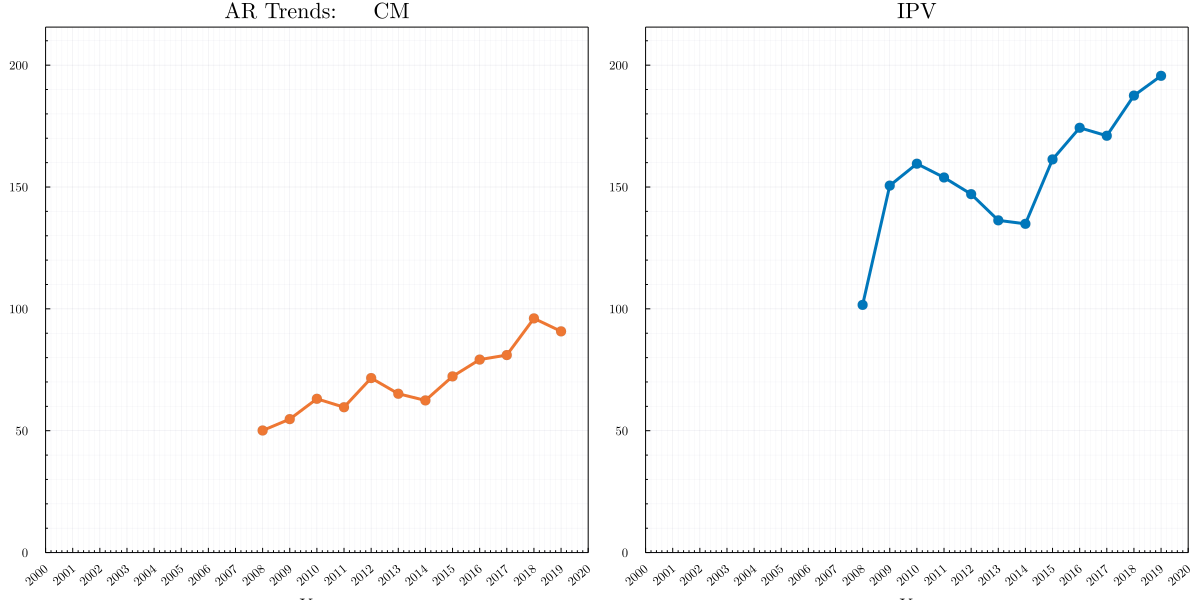

In [98]:
state = states[1]
sub_data = subset(data_norm, :state => ByRow(==(state)))
p1 = plot(sub_data.year, sub_data.CM_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=1,
   title= state *" Trends:" * "     CM" , linewidth=3)
p2 = plot(sub_data.year, sub_data.IPV_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=2,
title= "IPV" , linewidth=3)
plot(p1, p2, layout = (1,2), size = (1200, 600))
xlims!(2000, 2020)
xticks!(2000:2020)
ylims!(0, max(maximum(sub_data.CM_norm), maximum(sub_data.IPV_norm)) + 20)

In [99]:
for state ∈ states
    sub_data = subset(data_norm, :state => ByRow(==(state)))
    p1 = plot(sub_data.year, sub_data.CM_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=1,
    title= state *" Trends:" * "     CM" , linewidth=3)
    p2 = plot(sub_data.year, sub_data.IPV_norm, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=2,
    title= "IPV" , linewidth=3)
    plot(p1, p2, layout = (1,2), size = (1200, 600))
    xlims!(2000, 2020)
    xticks!(2000:2020)
    ylims!(0, max(maximum(sub_data.CM_norm), maximum(sub_data.IPV_norm)) + 20)
    savefig("./figures/trends_just_cont/$(state)_trend.pdf")
end

In [177]:
using PGFPlotsX

pgfplotsx()

Plots.PGFPlotsXBackend()

1

In [241]:
p1 = plot( xlab="Year", xrotation = 40, title=  " Trends:" * "     CM" , ylab="Incidents per 100,000",
    legend = (-0.12,-0.2),  legend_columns=-1)

data_norm1 = data_norm[data_norm.state .∈ Ref(unique(data_norm.state)[1:end]), :]

markers = [:circle, :rect, :star5, :diamond, :utriangle, :dtriangle, :rtriangle]
i = 1
for i ∈ 1:length( unique(data_norm1.state) )
    state = unique(data_norm1.state)[i]
    sub_data = subset(data_norm1, :state => ByRow(==(state)))
    plot!(sub_data.year, sub_data.CM_norm, c = i, 
    label = state, markershape=markers[(i<=7) ? i : i-7], linewidth=1, markersize = 3)
end
xlims!(2000, 2020)
xticks!(2000:2:2020)
ylims!(0, maximum(data_norm1.CM_norm) + 50)
savefig("./figures/trends_just_cont/all_states_trend_CM.pdf")

p2 = plot( xlab="Year", xrotation = 40, title=  " Trends:" * "     IPV",  ylab="Incidents per 100,000",
legend = (-0.12,-0.2),  legend_columns=-1)

for i ∈ 1:length( unique(data_norm1.state) )
    state = unique(data_norm1.state)[i]
    sub_data = subset(data_norm1, :state => ByRow(==(state)))
    plot!(sub_data.year, sub_data.IPV_norm, c=i,
    markershape=markers[(i<=7) ? i : i-7], linewidth=1, markersize = 3, label = state)
end
xlims!(2000, 2020)
xticks!(2000:2:2020)
ylims!(0, maximum(data_norm1.IPV_norm) + 50)

savefig("./figures/trends_just_cont/all_states_trend_IPV.pdf")

In [218]:
unique(data_norm.state)[1:7]

7-element Vector{Any}:
 "AR"
 "CO"
 "CT"
 "IA"
 "ID"
 "KY"
 "MA"

In [220]:
unique(data_norm.state)[8:end]

7-element Vector{Any}:
 "MI"
 "ND"
 "SC"
 "SD"
 "TN"
 "VA"
 "VT"